In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
from lib.visualizer import hourly_profile_heatmap
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df = query_table(table='main_terminal_1H')

In [4]:
df.shape

(2208, 1)

In [5]:
px.line(
    x=df.index,
    y=df.kw
)

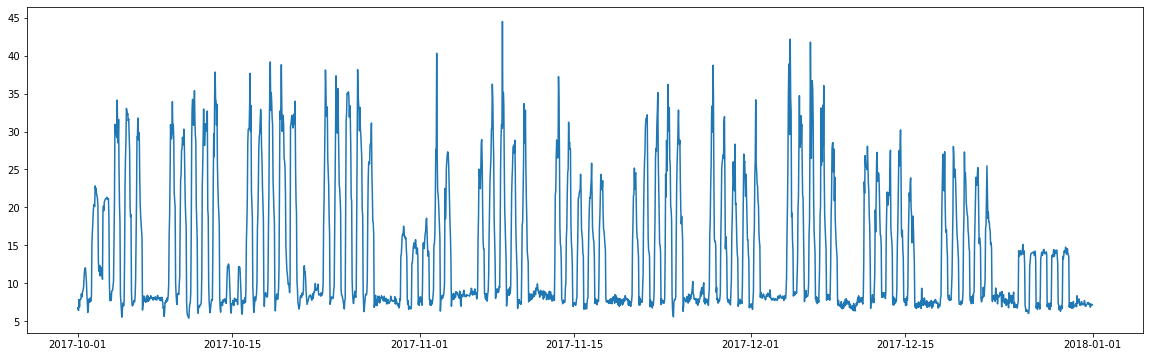

In [6]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df.kw)
plt.show()

In [21]:
df = df[(df.index >= '2017-10-01') & (df.index < '2017-10-29')]
time_int_range = np.arange(0, df.shape[0]*60, 60)
df['t_int'] = time_int_range
df['t_norm'] = (df['t_int'] - df['t_int'].min()) / (df['t_int'].max() - df['t_int'].min())

In [22]:
df.shape

(648, 3)

In [18]:
px.line(
    x=df.index,
    y=df.kw
)

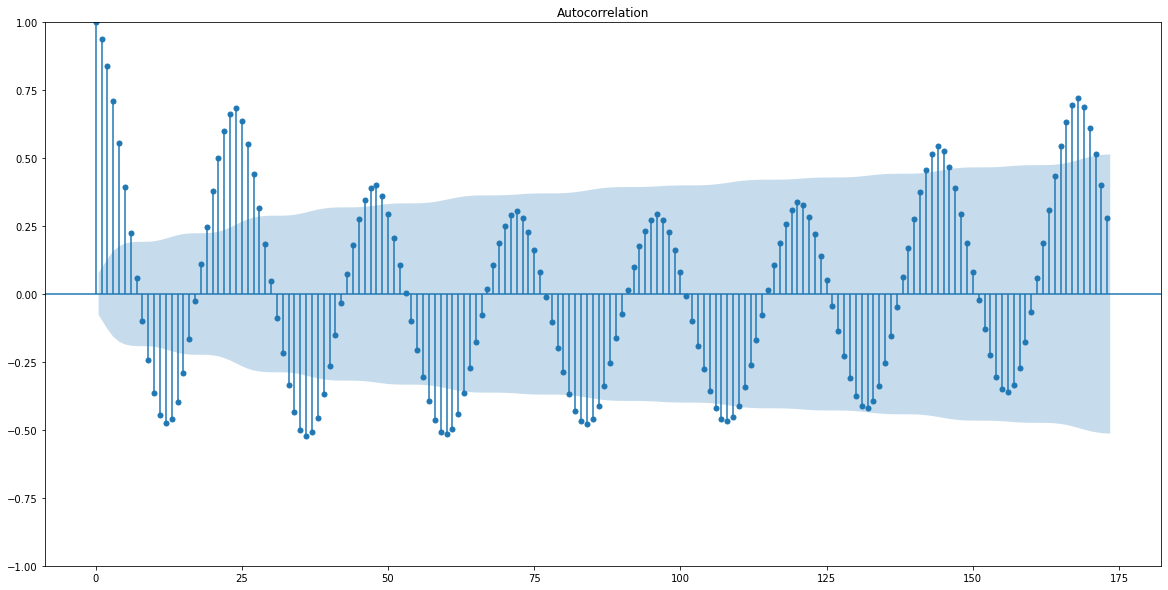

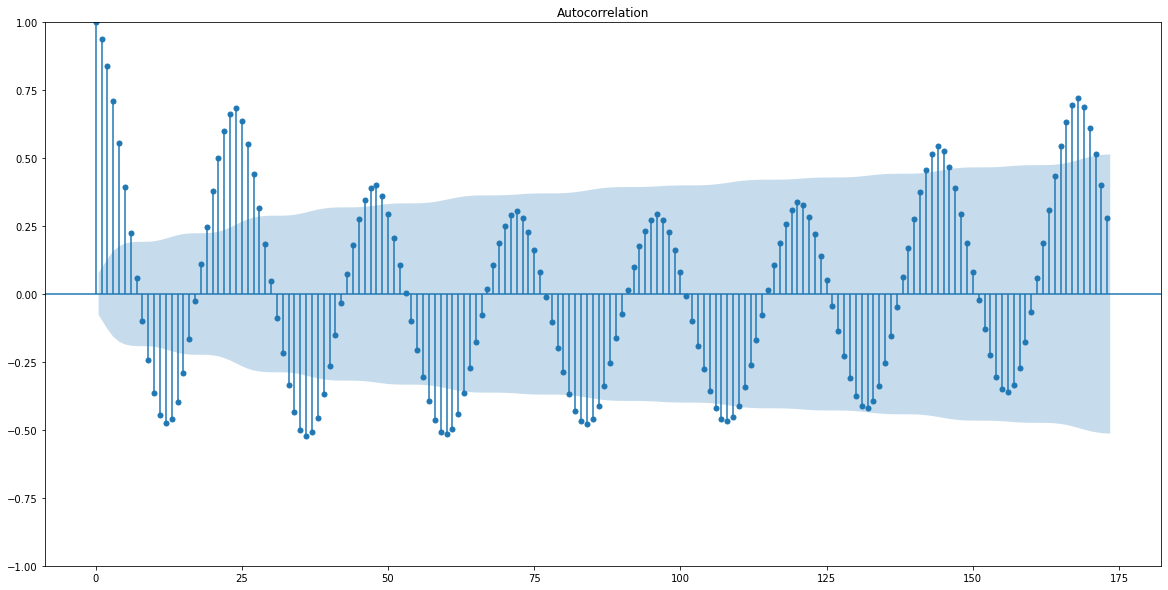

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df.kw.values.squeeze(), lags=173, ax=ax)

In [24]:
df['t_norm'].iloc[34], df['t_norm'].iloc[39]

(0.05255023183925812, 0.06027820710973725)

In [9]:
df['t_norm'].iloc[10], df['t_norm'].iloc[14]

(0.004531037607612143, 0.006343452650657001)

In [10]:
df['t_norm'].iloc[21], df['t_norm'].iloc[27]

(0.0095151789759855, 0.012233801540552787)

In [11]:
df['t_norm'].iloc[163], df['t_norm'].iloc[173]

(0.07385591300407793, 0.07838695061169007)

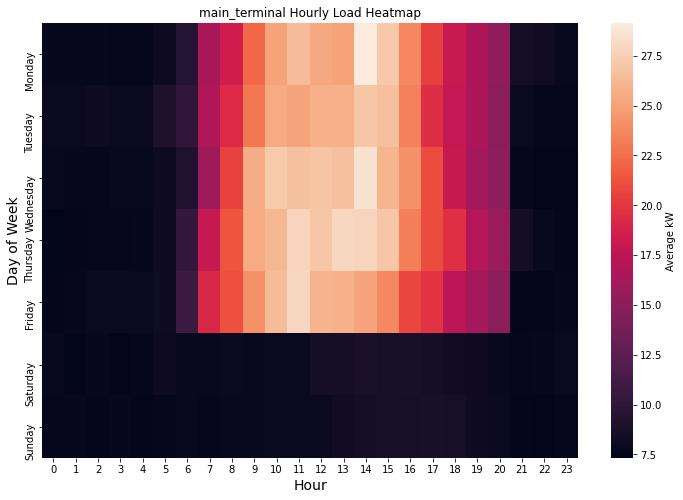

In [12]:
hourly_profile_heatmap(machine='main_terminal')